In [21]:
# !pip install yfinance
# !pip install pandas-datareader

In [1]:
import pandas as pd
from pandas_datareader import data
# import yfinance as yf
# pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns
# import os
import random

import torch
# import matplotlib as mpl
# import matplotlib.pyplot as plt
import numpy as np
# import pandas as pd
# pd.options.mode.chained_assignment = None
# import seaborn as sns
from tqdm import tqdm

c:\Program Files\Python37\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
# msft = yf.Ticker("MSFT")
# print(msft.info)
# print(msft.stats())

In [2]:
# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
tickers = ['^GSPC', 'APPL', 'MSFT']

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2012-01-01'  # '2014-01-01'  # 2012-10-21
end_date = '2022-11-22'  # '2014-10-20'  # 2022

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader('GOOGL', 'yahoo', start_date, end_date)

panel_data[panel_data.index.name] = panel_data.index
panel_data.index.name = None
panel_data = panel_data[['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']]
panel_data.reset_index(drop=True, inplace=True)

panel_data

,Date,High,Low,Open,Close,Volume,Adj Close
0,2012-01-03,16.720470,16.325577,16.339840,16.651901,146912940.0,16.651901
1,2012-01-04,16.773024,16.532032,16.642391,16.723724,114445440.0,16.723724
2,2012-01-05,16.615866,16.422173,16.569820,16.491741,131184684.0,16.491741
3,2012-01-06,16.516518,16.261011,16.495245,16.266768,107608284.0,16.266768
4,2012-01-09,16.191191,15.546296,16.178679,15.577077,232671096.0,15.577077
...,...,...,...,...,...,...,...
2737,2022-11-16,99.639999,97.639999,97.900002,98.849998,29105200.0,98.849998
2738,2022-11-17,99.279999,96.790001,96.970001,98.360001,26052600.0,98.360001
2739,2022-11-18,98.900002,96.370003,98.769997,97.430000,28328800.0,97.430000
2740,2022-11-21,98.400002,95.360001,97.290001,95.599998,21647400.0,95.599998


In [3]:
# panel_data.drop(columns=['Volume'], axis=1, inplace=True)
# panel_data

In [4]:
# panel_data.tail(10)

In [5]:
date = pd.to_datetime(panel_data.pop('Date'), format='%Y-%m-%d')

In [28]:
# introduzir datas em falta com valores nos dias em falta

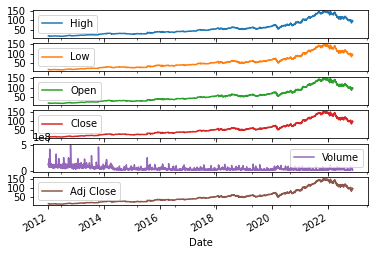

In [6]:
plot_cols = ['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']
# plot_cols = ['High', 'Low', 'Open', 'Close', 'Adj Close']
plot_features = panel_data[plot_cols]
plot_features.index = date
_ = plot_features.plot(subplots=True)

# plot_features = panel_data[plot_cols][:480]
# plot_features.index = date[:480]
# _ = plot_features.plot(subplots=True)

In [ ]:
# panel_data.plot(y="High")

In [7]:
panel_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
High,2742.0,5.578487e+01,3.568820e+01,1.412713e+01,2.805366e+01,4.745150e+01,6.841362e+01,1.515465e+02
Low,2742.0,5.466618e+01,3.485777e+01,1.392693e+01,2.765193e+01,4.682000e+01,6.727075e+01,1.488990e+02
Open,2742.0,5.523522e+01,3.528297e+01,1.402252e+01,2.790234e+01,4.717275e+01,6.781787e+01,1.512500e+02
Close,2742.0,5.523770e+01,3.527372e+01,1.399024e+01,2.787362e+01,4.711875e+01,6.774137e+01,1.498385e+02
Volume,2742.0,4.856002e+07,3.564670e+07,9.312000e+06,2.761100e+07,3.627000e+07,5.842063e+07,4.971983e+08
Adj Close,2742.0,5.523770e+01,3.527372e+01,1.399024e+01,2.787362e+01,4.711875e+01,6.774137e+01,1.498385e+02


# LSTM

In [ ]:
# Remove invalid values / Outliers
# vol = panel_data['Volume']
# out_vol = (vol == 52070.0)
# vol[out_vol] = 0.0
# out_vol = (vol == 39057.0)
# vol[out_vol] = 0.0
# out_vol = (vol == 16682.0)
# vol[out_vol] = 0.0
# out_vol = (vol == 14627.0)
# vol[out_vol] = 0.0
# out_vol = (vol == 13000.0)
# vol[out_vol] = 0.0
# out_vol = (vol == 12341.0)
# vol[out_vol] = 0.0
# out_vol = (vol == 10000.0)
# vol[out_vol] = 0.0
# out_vol = (vol == 3826.0)
# vol[out_vol] = 0.0
# out_vol = (vol == 3800.0)
# vol[out_vol] = 0.0
# out_vol = (vol == 2817.0)
# vol[out_vol] = 0.0
# out_vol = (vol == 2500.0)
# vol[out_vol] = 0.0
# out_vol = (vol == 2199.0)
# vol[out_vol] = 0.0
# out_vol = (vol == 2047.0)
# vol[out_vol] = 0.0
# out_vol = (vol == 1747.0)
# vol[out_vol] = 0.0
# out_vol = (vol == 1577.0)
# vol[out_vol] = 0.0
# out_vol = (vol == 1482.0)
# vol[out_vol] = 0.0
# out_vol = (vol == 1459.0)
# vol[out_vol] = 0.0
# out_vol = (vol == 1265.0)
# vol[out_vol] = 0.0
# out_vol = (vol == 1221.0)
# vol[out_vol] = 0.0
# out_vol = (vol == 1212.0)
# vol[out_vol] = 0.0
# out_vol = (vol == 1199.0)
# vol[out_vol] = 0.0
# out_vol = (vol == 1155.0)
# vol[out_vol] = 0.0
# out_vol = (vol == 1141.0)
# vol[out_vol] = 0.0
# out_vol = (vol == 1117.0)
# vol[out_vol] = 0.0

# # The above inplace edits are reflected in the DataFrame.
# # panel_data['wv (m/s)'].min()
# panel_data.describe().transpose()

In [17]:
column_indices = {name: i for i, name in enumerate(panel_data.columns)}

n = len(panel_data)
train_df = panel_data[0:int(n*0.7)]
val_df = panel_data[int(n*0.7):int(n*0.9)]
test_df = panel_data[int(n*0.9):]

num_features = panel_data.shape[1]

In [18]:
train_df['High'].mean()

36.35653071629622

In [12]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
High,1919.0,3.635653e+01,1.439159e+01,1.412713e+01,2.591029e+01,3.520000e+01,4.973850e+01,6.484850e+01
Low,1919.0,3.573206e+01,1.411798e+01,1.392693e+01,2.547400e+01,3.438900e+01,4.888850e+01,6.358550e+01
Open,1919.0,3.605752e+01,1.425604e+01,1.402252e+01,2.576176e+01,3.471300e+01,4.937725e+01,6.445600e+01
Close,1919.0,3.605477e+01,1.426122e+01,1.399024e+01,2.569007e+01,3.476750e+01,4.937225e+01,6.481000e+01
Volume,1919.0,5.469261e+07,3.987748e+07,1.041200e+07,2.979600e+07,4.077000e+07,7.113080e+07,4.971983e+08
Adj Close,1919.0,3.605477e+01,1.426122e+01,1.399024e+01,2.569007e+01,3.476750e+01,4.937225e+01,6.481000e+01


In [13]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std


<AxesSubplot:>

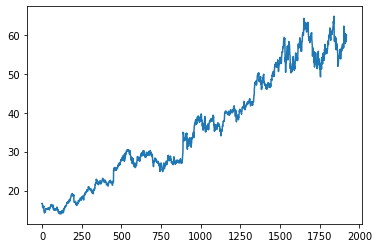

In [19]:
train_df['Close'].plot()

<AxesSubplot:>

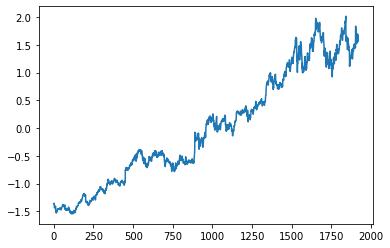

In [16]:
train_df['Close'].plot()

In [18]:
train_mean

High         3.635653e+01
Low          3.573206e+01
Open         3.605752e+01
Close        3.605477e+01
Volume       5.469261e+07
Adj Close    3.605477e+01
dtype: float64

In [19]:
train_std

High         1.439159e+01
Low          1.411798e+01
Open         1.425604e+01
Close        1.426122e+01
Volume       3.987748e+07
Adj Close    1.426122e+01
dtype: float64

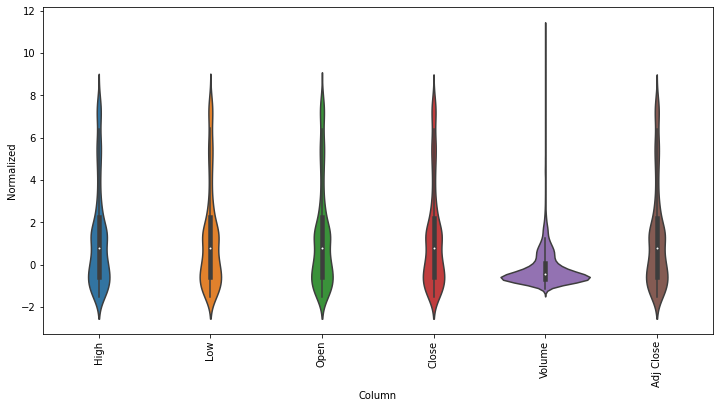

In [20]:
# Look at normalized data
df_std = (panel_data - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(panel_data.keys(), rotation=90)

## LSTM

In [21]:
class TickerData(torch.utils.data.Dataset):
    def __init__(self, df, input_width, target_width):
        ## YOUR CODE HERE ##
        data_np = np.array(df)
        self.inputs = [torch.FloatTensor(data_np[i : i + input_width])
                       for i in range(0, len(data_np) - input_width, input_width)]
        self.targets = [torch.FloatTensor(data_np[i : i + target_width])
                        for i in range(input_width, len(data_np) - target_width, input_width)]
        ## *** ##               
    def __getitem__(self, idx):
        return {'inputs': self.inputs[idx],
                'targets': self.targets[idx]}
    
    def __len__(self):
        return min(len(self.inputs), len(self.targets))

In [22]:
# We will use the observations of the previous 24 hours to predict the temperature for the next 24 hours. (7 days)
# Thus, we will set both `input_width` and `target_width` to 24 in the instances of the dataset.

INPUT_WIDTH = 5  # 7  # 24
TARGET_WIDTH = 3  # 7  # 24

train_data = TickerData(train_df, INPUT_WIDTH, TARGET_WIDTH)
val_data = TickerData(val_df, INPUT_WIDTH, TARGET_WIDTH)
test_data = TickerData(test_df, INPUT_WIDTH, TARGET_WIDTH)

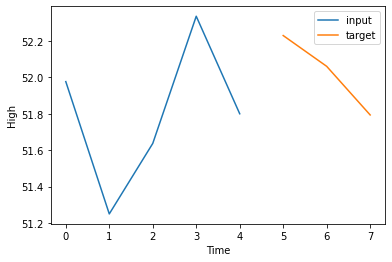

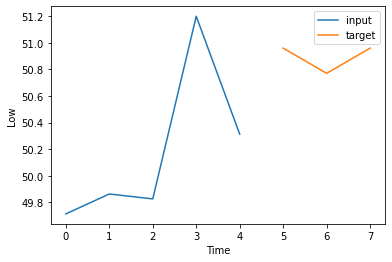

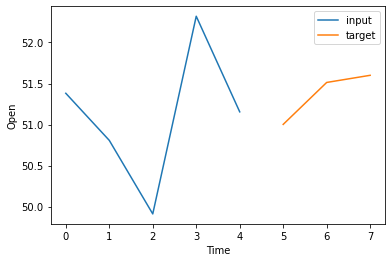

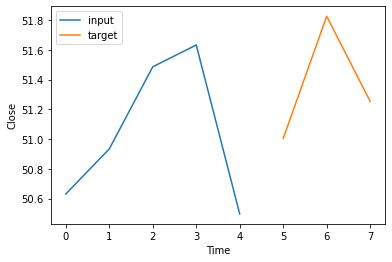

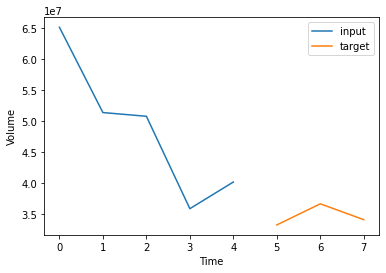

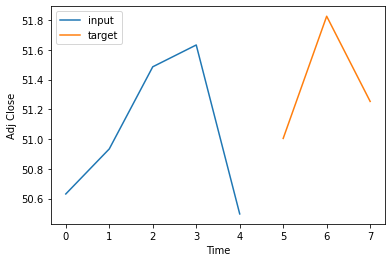

In [24]:
# Let's visualize some examples
idx = random.randint(0, len(train_data))
inputs = train_data[idx]['inputs'].numpy()
targets = train_data[idx]['targets'].numpy()

for i in range(len(train_df.columns)):
    plt.plot(range(INPUT_WIDTH), inputs[:,i], label='input')
    plt.plot(range(INPUT_WIDTH, INPUT_WIDTH + TARGET_WIDTH), targets[:,i], label='target')
    plt.ylabel(train_df.columns[i])
    plt.xlabel('Time')
    plt.legend()
    plt.show()

In [25]:
class TickerPredictor(torch.nn.Module):
    def __init__(self, num_features, hidden_size):
        super().__init__()
        self.hidden_size = hidden_size
        # instantiate a torch.nn.LSTMCell and a torch.nn.Linear layer
        ## YOUR CODE HERE ##
        self.lstm = torch.nn.LSTMCell(num_features, hidden_size)
        self.linear = torch.nn.Linear(hidden_size, num_features)
        ## *** ##
        
    def forward(self, inputs, num_steps):
        inputs = inputs.transpose(0, 1)  # batch, time, dim -> time, batch, dim
        
        # we initialize the internal states of the LSTM with zeros
        hx = torch.zeros((inputs.shape[1], self.hidden_size), device=inputs.device)
        cx = torch.zeros((inputs.shape[1], self.hidden_size), device=inputs.device)
        
        # warmup: feed the inputs through the LSTM one by one from t = 0 up to t = T-1
        ## YOUR CODE HERE ##
        for t in range(inputs.shape[0] - 1):
            hx, cx = self.lstm(inputs[t], (hx, cx))
        ## *** ##
        
        # predict num_steps into the future autoregressively
        outputs = []
        input_t = inputs[-1]
        ## YOUR CODE HERE ##
        for t in range(num_steps):
            hx, cx = self.lstm(input_t, (hx, cx))
            output_t = self.linear(hx)
            outputs.append(output_t)
            input_t = output_t
        ## *** ##
        
        # stack the list of outputs into a single tensor
        outputs = torch.stack(outputs)
        
        outputs = outputs.transpose(0, 1)  # time, batch, dim -> batch, time, dim
        return outputs
        

In [26]:
def evaluate(model, data_loader, **kwargs):
    loss_fn = kwargs.get('loss_fn', torch.nn.functional.mse_loss)
    device = kwargs.get('device', torch.device('cpu'))
    
    model.eval()
    pbar = tqdm(enumerate(data_loader), total=len(data_loader))
    avg_loss = 0.
    for i, batch in pbar:
        ## YOUR CODE HERE ##
        batch['inputs'] = batch['inputs'].to(device)
        batch['targets'] = batch['targets'].to(device)
        num_steps = batch['targets'].shape[1]
        with torch.no_grad():
            preds = model(batch['inputs'], num_steps)
        loss = loss_fn(preds, batch['targets'])
        avg_loss += loss.item()
        ## *** ##
        pbar.set_description(f'loss = {loss:.3f}')
    avg_loss /= len(data_loader)
    return avg_loss

def fit(model, train_loader, val_loader, optimizer, **kwargs):
    num_epochs = kwargs.get('num_epochs', 100)
    loss_fn = kwargs.get('loss_fn', torch.nn.functional.mse_loss)
    device = kwargs.get('device', torch.device('cpu'))
    
    train_loss_hist, val_loss_hist = [], []
    for epoch in range(num_epochs):
        print(f'Epoch {epoch + 1}/{num_epochs}')
        
        print('Training phase...')
        model.train()
        train_loss = 0.
        pbar = tqdm(enumerate(train_loader), total=len(train_loader))
        for i, batch in pbar:
            ## YOUR CODE HERE ##
            batch['inputs'] = batch['inputs'].to(device)
            batch['targets'] = batch['targets'].to(device)
            model.zero_grad()
            num_steps = batch['targets'].shape[1]
            preds = model(batch['inputs'], num_steps)
            loss = loss_fn(preds, batch['targets'])
            loss.backward()
            optimizer.step()
            ## *** ##
            train_loss += loss.item()
            pbar.set_description(f'loss = {loss:.3f}')
        train_loss /= len(train_loader)
        print(f'train loss = {train_loss:.3f}')
        train_loss_hist.append(train_loss)
        
        print('Validation phase...')
        val_loss = evaluate(model, val_loader, loss_fn=loss_fn, device=device)
        print(f'validation loss = {val_loss:.3f}')
        val_loss_hist.append(val_loss)
        
    return train_loss_hist, val_loss_hist
        

In [27]:
HIDDEN_SIZE = 32
LEARNING_RATE = 1e-3
NUM_EPOCHS = 100
BATCH_SIZE = 16

if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
# elif torch.backends.mps.is_available():
#     DEVICE = torch.device('mps')
else:
    DEVICE = torch.device('cpu')
print('DEVICE:', DEVICE)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=BATCH_SIZE)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE)

model = TickerPredictor(train_data[0]['inputs'].shape[1], HIDDEN_SIZE).to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

DEVICE: cuda


In [28]:
train_loss, val_loss = fit(model, train_loader, val_loader, optimizer, num_epochs=NUM_EPOCHS, device=DEVICE)

Epoch 1/100
Training phase...


loss = 402241605337088.000: 100%|██████████| 24/24 [00:11<00:00,  2.04it/s] 


train loss = 807070411172522.625
Validation phase...


loss = 137225815719936.000: 100%|██████████| 7/7 [00:00<00:00, 86.42it/s]


validation loss = 227007218881097.156
Epoch 2/100
Training phase...


loss = 778459265630208.000: 100%|██████████| 24/24 [00:00<00:00, 31.31it/s] 


train loss = 808050153051477.375
Validation phase...


loss = 137225790554112.000: 100%|██████████| 7/7 [00:00<00:00, 88.61it/s]


validation loss = 227007208095744.000
Epoch 3/100
Training phase...


loss = 586122040180736.000: 100%|██████████| 24/24 [00:00<00:00, 33.34it/s] 


train loss = 807549251092480.000
Validation phase...


loss = 137225773776896.000: 100%|██████████| 7/7 [00:00<00:00, 77.78it/s]


validation loss = 227007178136429.719
Epoch 4/100
Training phase...


loss = 549451206754304.000: 100%|██████████| 24/24 [00:00<00:00, 30.92it/s] 


train loss = 807453697856853.375
Validation phase...


loss = 137225756999680.000: 100%|██████████| 7/7 [00:00<00:00, 72.92it/s]


validation loss = 227007161359213.719
Epoch 5/100
Training phase...


loss = 2077561043550208.000: 100%|██████████| 24/24 [00:00<00:00, 31.24it/s]


train loss = 811433110885717.375
Validation phase...


loss = 137225748611072.000: 100%|██████████| 7/7 [00:00<00:00, 66.71it/s]


validation loss = 227007148177115.438
Epoch 6/100
Training phase...


loss = 540765373595648.000: 100%|██████████| 24/24 [00:00<00:00, 37.80it/s] 


train loss = 807431026245632.000
Validation phase...


loss = 137225740222464.000: 100%|██████████| 7/7 [00:00<00:00, 100.16it/s]


validation loss = 227007143383625.156
Epoch 7/100
Training phase...


loss = 435466499260416.000: 100%|██████████| 24/24 [00:00<00:00, 35.82it/s] 


train loss = 807156785173845.375
Validation phase...


loss = 137225740222464.000: 100%|██████████| 7/7 [00:00<00:00, 83.71it/s]


validation loss = 227007131399899.438
Epoch 8/100
Training phase...


loss = 452533726216192.000: 100%|██████████| 24/24 [00:00<00:00, 25.12it/s] 


train loss = 807201230116181.375
Validation phase...


loss = 137225715056640.000: 100%|██████████| 7/7 [00:00<00:00, 97.85it/s]


validation loss = 227007115821056.000
Epoch 9/100
Training phase...


loss = 1427981599768576.000: 100%|██████████| 24/24 [00:00<00:00, 33.38it/s]


train loss = 809741441826816.000
Validation phase...


loss = 137225715056640.000: 100%|██████████| 7/7 [00:00<00:00, 98.59it/s]


validation loss = 227007111027565.719
Epoch 10/100
Training phase...


loss = 687733584429056.000: 100%|██████████| 24/24 [00:00<00:00, 38.22it/s] 


train loss = 807813706153984.000
Validation phase...


loss = 137225698279424.000: 100%|██████████| 7/7 [00:00<00:00, 90.03it/s]


validation loss = 227007096647094.844
Epoch 11/100
Training phase...


loss = 528792313397248.000: 100%|██████████| 24/24 [00:00<00:00, 36.43it/s] 


train loss = 807399767496021.375
Validation phase...


loss = 137225698279424.000: 100%|██████████| 7/7 [00:00<00:00, 98.89it/s]


validation loss = 227007087060114.281
Epoch 12/100
Training phase...


loss = 840864670679040.000: 100%|██████████| 24/24 [00:00<00:00, 40.03it/s] 


train loss = 808212429275136.000
Validation phase...


loss = 137225698279424.000: 100%|██████████| 7/7 [00:00<00:00, 110.05it/s]


validation loss = 227007067886153.156
Epoch 13/100
Training phase...


loss = 571106096316416.000: 100%|██████████| 24/24 [00:00<00:00, 36.75it/s] 


train loss = 807509919705770.625
Validation phase...


loss = 137225681502208.000: 100%|██████████| 7/7 [00:00<00:00, 108.47it/s]


validation loss = 227007055902427.438
Epoch 14/100
Training phase...


loss = 1096345700007936.000: 100%|██████████| 24/24 [00:00<00:00, 38.50it/s]


train loss = 808877697619285.375
Validation phase...


loss = 137225681502208.000: 100%|██████████| 7/7 [00:00<00:00, 94.83it/s]


validation loss = 227007054704054.844
Epoch 15/100
Training phase...


loss = 612024182636544.000: 100%|██████████| 24/24 [00:00<00:00, 34.31it/s] 


train loss = 807616459221674.625
Validation phase...


loss = 137225664724992.000: 100%|██████████| 7/7 [00:00<00:00, 82.35it/s]


validation loss = 227007048712192.000
Epoch 16/100
Training phase...


loss = 2181671319240704.000: 100%|██████████| 24/24 [00:00<00:00, 38.09it/s]


train loss = 811704044748800.000
Validation phase...


loss = 137225664724992.000: 100%|██████████| 7/7 [00:00<00:00, 99.99it/s]


validation loss = 227007046315446.844
Epoch 17/100
Training phase...


loss = 419047845920768.000: 100%|██████████| 24/24 [00:00<00:00, 39.09it/s] 


train loss = 807113859967658.625
Validation phase...


loss = 137225656336384.000: 100%|██████████| 7/7 [00:00<00:00, 88.75it/s]


validation loss = 227007030736603.438
Epoch 18/100
Training phase...


loss = 617376584302592.000: 100%|██████████| 24/24 [00:00<00:00, 39.51it/s] 


train loss = 807630361242282.625
Validation phase...


loss = 137225647947776.000: 100%|██████████| 7/7 [00:00<00:00, 103.77it/s]


validation loss = 227007011562642.281
Epoch 19/100
Training phase...


loss = 632140265947136.000: 100%|██████████| 24/24 [00:00<00:00, 36.91it/s] 


train loss = 807668767784960.000
Validation phase...


loss = 137225639559168.000: 100%|██████████| 7/7 [00:00<00:00, 98.59it/s]


validation loss = 227007005570779.438
Epoch 20/100
Training phase...


loss = 414440855961600.000: 100%|██████████| 24/24 [00:00<00:00, 38.14it/s] 


train loss = 807101829305685.375
Validation phase...


loss = 137225639559168.000: 100%|██████████| 7/7 [00:00<00:00, 93.34it/s]


validation loss = 227006998380544.000
Epoch 21/100
Training phase...


loss = 554545037967360.000: 100%|██████████| 24/24 [00:00<00:00, 38.66it/s] 


train loss = 807466662450517.375
Validation phase...


loss = 137225631170560.000: 100%|██████████| 7/7 [00:00<00:00, 100.00it/s]


validation loss = 227006989991936.000
Epoch 22/100
Training phase...


loss = 597944206098432.000: 100%|██████████| 24/24 [00:00<00:00, 44.54it/s]


train loss = 807579654204074.625
Validation phase...


loss = 137225614393344.000: 100%|██████████| 7/7 [00:00<00:00, 155.55it/s]


validation loss = 227006978008210.281
Epoch 23/100
Training phase...


loss = 634292916977664.000: 100%|██████████| 24/24 [00:00<00:00, 67.64it/s]


train loss = 807674319645354.625
Validation phase...


loss = 137225614393344.000: 100%|██████████| 7/7 [00:00<00:00, 194.88it/s]


validation loss = 227006968421229.719
Epoch 24/100
Training phase...


loss = 547971758292992.000: 100%|██████████| 24/24 [00:00<00:00, 65.88it/s] 


train loss = 807449483979434.625
Validation phase...


loss = 137225597616128.000: 100%|██████████| 7/7 [00:00<00:00, 120.68it/s]


validation loss = 227006955239131.438
Epoch 25/100
Training phase...


loss = 709289891069952.000: 100%|██████████| 24/24 [00:00<00:00, 72.51it/s] 


train loss = 807869558904149.375
Validation phase...


loss = 137225589227520.000: 100%|██████████| 7/7 [00:00<00:00, 170.74it/s]


validation loss = 227006944453778.281
Epoch 26/100
Training phase...


loss = 659734222864384.000: 100%|██████████| 24/24 [00:00<00:00, 66.80it/s] 


train loss = 807740519743488.000
Validation phase...


loss = 137225580838912.000: 100%|██████████| 7/7 [00:00<00:00, 145.83it/s]


validation loss = 227006937263542.844
Epoch 27/100
Training phase...


loss = 649350267011072.000: 100%|██████████| 24/24 [00:00<00:00, 72.60it/s] 


train loss = 807713462288384.000
Validation phase...


loss = 137225564061696.000: 100%|██████████| 7/7 [00:00<00:00, 162.80it/s]


validation loss = 227006927676562.281
Epoch 28/100
Training phase...


loss = 800062816911360.000: 100%|██████████| 24/24 [00:00<00:00, 71.44it/s] 


train loss = 808105906536448.000
Validation phase...


loss = 137225564061696.000: 100%|██████████| 7/7 [00:00<00:00, 140.86it/s]


validation loss = 227006916891209.156
Epoch 29/100
Training phase...


loss = 760553949626368.000: 100%|██████████| 24/24 [00:00<00:00, 76.46it/s] 


train loss = 808003042628949.375
Validation phase...


loss = 137225547284480.000: 100%|██████████| 7/7 [00:00<00:00, 129.62it/s]


validation loss = 227006912097718.844
Epoch 30/100
Training phase...


loss = 848106925064192.000: 100%|██████████| 24/24 [00:00<00:00, 62.35it/s]


train loss = 808230984876032.000
Validation phase...


loss = 137225547284480.000: 100%|██████████| 7/7 [00:00<00:00, 127.27it/s]


validation loss = 227006904907483.438
Epoch 31/100
Training phase...


loss = 2673515136286720.000: 100%|██████████| 24/24 [00:00<00:00, 75.05it/s]


train loss = 812984633567914.625
Validation phase...


loss = 137225547284480.000: 100%|██████████| 7/7 [00:00<00:00, 152.11it/s]


validation loss = 227006897717248.000
Epoch 32/100
Training phase...


loss = 918511908028416.000: 100%|██████████| 24/24 [00:00<00:00, 68.52it/s] 


train loss = 808414312311466.625
Validation phase...


loss = 137225538895872.000: 100%|██████████| 7/7 [00:00<00:00, 174.82it/s]


validation loss = 227006884535149.719
Epoch 33/100
Training phase...


loss = 375645423009792.000: 100%|██████████| 24/24 [00:00<00:00, 75.52it/s]


train loss = 807000563428010.625
Validation phase...


loss = 137225530507264.000: 100%|██████████| 7/7 [00:00<00:00, 194.49it/s]


validation loss = 227006868956306.281
Epoch 34/100
Training phase...


loss = 405990507806720.000: 100%|██████████| 24/24 [00:00<00:00, 71.22it/s] 


train loss = 807079581319168.000
Validation phase...


loss = 137225530507264.000: 100%|██████████| 7/7 [00:00<00:00, 139.99it/s]


validation loss = 227006868956306.281
Epoch 35/100
Training phase...


loss = 1062931458424832.000: 100%|██████████| 24/24 [00:00<00:00, 68.34it/s]


train loss = 808790359627093.375
Validation phase...


loss = 137225522118656.000: 100%|██████████| 7/7 [00:00<00:00, 179.51it/s]


validation loss = 227006853377462.844
Epoch 36/100
Training phase...


loss = 1072431657648128.000: 100%|██████████| 24/24 [00:00<00:00, 68.58it/s]


train loss = 808815106020693.375
Validation phase...


loss = 137225522118656.000: 100%|██████████| 7/7 [00:00<00:00, 162.77it/s]


validation loss = 227006848583972.562
Epoch 37/100
Training phase...


loss = 426574474117120.000: 100%|██████████| 24/24 [00:00<00:00, 73.94it/s]


train loss = 807133168446122.625
Validation phase...


loss = 137225496952832.000: 100%|██████████| 7/7 [00:00<00:00, 194.42it/s]


validation loss = 227006834203501.719
Epoch 38/100
Training phase...


loss = 515439092301824.000: 100%|██████████| 24/24 [00:00<00:00, 67.45it/s]


train loss = 807364574489258.625
Validation phase...


loss = 137225488564224.000: 100%|██████████| 7/7 [00:00<00:00, 129.63it/s]


validation loss = 227006825814893.719
Epoch 39/100
Training phase...


loss = 1436558917894144.000: 100%|██████████| 24/24 [00:00<00:00, 66.14it/s]


train loss = 809763327705088.000
Validation phase...


loss = 137225488564224.000: 100%|██████████| 7/7 [00:00<00:00, 142.85it/s]


validation loss = 227006825814893.719
Epoch 40/100
Training phase...


loss = 600859079606272.000: 100%|██████████| 24/24 [00:00<00:00, 66.30it/s] 


train loss = 807586978856960.000
Validation phase...


loss = 137225488564224.000: 100%|██████████| 7/7 [00:00<00:00, 194.44it/s]


validation loss = 227006816227913.156
Epoch 41/100
Training phase...


loss = 552820709261312.000: 100%|██████████| 24/24 [00:00<00:00, 69.00it/s]


train loss = 807461878147754.625
Validation phase...


loss = 137225480175616.000: 100%|██████████| 7/7 [00:00<00:00, 159.11it/s]


validation loss = 227006795855579.438
Epoch 42/100
Training phase...


loss = 574848623443968.000: 100%|██████████| 24/24 [00:00<00:00, 66.29it/s] 


train loss = 807519222672042.625
Validation phase...


loss = 137225471787008.000: 100%|██████████| 7/7 [00:00<00:00, 142.86it/s]


validation loss = 227006787466971.438
Epoch 43/100
Training phase...


loss = 1030508951633920.000: 100%|██████████| 24/24 [00:00<00:00, 72.79it/s]


train loss = 808705813643264.000
Validation phase...


loss = 137225455009792.000: 100%|██████████| 7/7 [00:00<00:00, 175.02it/s]


validation loss = 227006781475108.562
Epoch 44/100
Training phase...


loss = 839014814842880.000: 100%|██████████| 24/24 [00:00<00:00, 72.51it/s] 


train loss = 808207124878677.375
Validation phase...


loss = 137225455009792.000: 100%|██████████| 7/7 [00:00<00:00, 118.65it/s]


validation loss = 227006781475108.562
Epoch 45/100
Training phase...


loss = 975885960216576.000: 100%|██████████| 24/24 [00:00<00:00, 72.07it/s] 


train loss = 808563535861077.375
Validation phase...


loss = 137225446621184.000: 100%|██████████| 7/7 [00:00<00:00, 200.03it/s]


validation loss = 227006771888128.000
Epoch 46/100
Training phase...


loss = 621603234775040.000: 100%|██████████| 24/24 [00:00<00:00, 74.53it/s] 


train loss = 807640921800704.000
Validation phase...


loss = 137225438232576.000: 100%|██████████| 7/7 [00:00<00:00, 167.74it/s]


validation loss = 227006759904402.281
Epoch 47/100
Training phase...


loss = 1167639472766976.000: 100%|██████████| 24/24 [00:00<00:00, 70.10it/s]


train loss = 809062874742784.000
Validation phase...


loss = 137225438232576.000: 100%|██████████| 7/7 [00:00<00:00, 179.48it/s]


validation loss = 227006752714166.844
Epoch 48/100
Training phase...


loss = 621153806712832.000: 100%|██████████| 24/24 [00:00<00:00, 79.53it/s] 


train loss = 807639713841152.000
Validation phase...


loss = 137225421455360.000: 100%|██████████| 7/7 [00:00<00:00, 159.09it/s]


validation loss = 227006747920676.562
Epoch 49/100
Training phase...


loss = 449661634609152.000: 100%|██████████| 24/24 [00:00<00:00, 74.07it/s] 


train loss = 807193107147434.625
Validation phase...


loss = 137225421455360.000: 100%|██████████| 7/7 [00:00<00:00, 166.67it/s]


validation loss = 227006732341833.156
Epoch 50/100
Training phase...


loss = 863640882249728.000: 100%|██████████| 24/24 [00:00<00:00, 78.43it/s] 


train loss = 808271174696960.000
Validation phase...


loss = 137225396289536.000: 100%|██████████| 7/7 [00:00<00:00, 152.18it/s]


validation loss = 227006717961362.281
Epoch 51/100
Training phase...


loss = 744180997423104.000: 100%|██████████| 24/24 [00:00<00:00, 76.43it/s] 


train loss = 807960046119594.625
Validation phase...


loss = 137225387900928.000: 100%|██████████| 7/7 [00:00<00:00, 170.73it/s]


validation loss = 227006713167872.000
Epoch 52/100
Training phase...


loss = 503979582685184.000: 100%|██████████| 24/24 [00:00<00:00, 77.49it/s] 


train loss = 807334519504896.000
Validation phase...


loss = 137225387900928.000: 100%|██████████| 7/7 [00:00<00:00, 184.21it/s]


validation loss = 227006697589028.562
Epoch 53/100
Training phase...


loss = 869665312079872.000: 100%|██████████| 24/24 [00:00<00:00, 76.68it/s] 


train loss = 808286788692650.625
Validation phase...


loss = 137225387900928.000: 100%|██████████| 7/7 [00:00<00:00, 174.98it/s]


validation loss = 227006689200420.562
Epoch 54/100
Training phase...


loss = 722602477748224.000: 100%|██████████| 24/24 [00:00<00:00, 68.77it/s] 


train loss = 807903812386816.000
Validation phase...


loss = 137225379512320.000: 100%|██████████| 7/7 [00:00<00:00, 184.23it/s]


validation loss = 227006688002048.000
Epoch 55/100
Training phase...


loss = 682630760628224.000: 100%|██████████| 24/24 [00:00<00:00, 70.02it/s] 


train loss = 807799708363434.625
Validation phase...


loss = 137225371123712.000: 100%|██████████| 7/7 [00:00<00:00, 179.50it/s]


validation loss = 227006677216694.844
Epoch 56/100
Training phase...


loss = 535703754637312.000: 100%|██████████| 24/24 [00:00<00:00, 75.22it/s] 


train loss = 807417057815210.625
Validation phase...


loss = 137225371123712.000: 100%|██████████| 7/7 [00:00<00:00, 162.79it/s]


validation loss = 227006676018322.281
Epoch 57/100
Training phase...


loss = 494808585994240.000: 100%|██████████| 24/24 [00:00<00:00, 67.62it/s]


train loss = 807310557446144.000
Validation phase...


loss = 137225362735104.000: 100%|██████████| 7/7 [00:00<00:00, 148.94it/s]


validation loss = 227006661637851.438
Epoch 58/100
Training phase...


loss = 371086550106112.000: 100%|██████████| 24/24 [00:00<00:00, 70.59it/s] 


train loss = 806988367790080.000
Validation phase...


loss = 137225362735104.000: 100%|██████████| 7/7 [00:00<00:00, 170.75it/s]


validation loss = 227006655645988.562
Epoch 59/100
Training phase...


loss = 281717004828672.000: 100%|██████████| 24/24 [00:00<00:00, 71.01it/s] 


train loss = 806755607685802.625
Validation phase...


loss = 137225337569280.000: 100%|██████████| 7/7 [00:00<00:00, 179.47it/s]


validation loss = 227006640067145.156
Epoch 60/100
Training phase...


loss = 236297406906368.000: 100%|██████████| 24/24 [00:00<00:00, 75.23it/s] 


train loss = 806637296855722.625
Validation phase...


loss = 137225337569280.000: 100%|██████████| 7/7 [00:00<00:00, 145.88it/s]


validation loss = 227006632876909.719
Epoch 61/100
Training phase...


loss = 683569949179904.000: 100%|██████████| 24/24 [00:00<00:00, 72.04it/s] 


train loss = 807802050183168.000
Validation phase...


loss = 137225320792064.000: 100%|██████████| 7/7 [00:00<00:00, 168.08it/s]


validation loss = 227006625686674.281
Epoch 62/100
Training phase...


loss = 527258338983936.000: 100%|██████████| 24/24 [00:00<00:00, 70.42it/s]


train loss = 807394994378069.375
Validation phase...


loss = 137225320792064.000: 100%|██████████| 7/7 [00:00<00:00, 120.68it/s]


validation loss = 227006617298066.281
Epoch 63/100
Training phase...


loss = 569275702050816.000: 100%|██████████| 24/24 [00:00<00:00, 72.51it/s] 


train loss = 807504394409301.375
Validation phase...


loss = 137225320792064.000: 100%|██████████| 7/7 [00:00<00:00, 159.09it/s]


validation loss = 227006606512713.156
Epoch 64/100
Training phase...


loss = 1283034909245440.000: 100%|██████████| 24/24 [00:00<00:00, 77.48it/s]


train loss = 809363132383232.000
Validation phase...


loss = 137225320792064.000: 100%|██████████| 7/7 [00:00<00:00, 174.99it/s]


validation loss = 227006606512713.156
Epoch 65/100
Training phase...


loss = 2590803461406720.000: 100%|██████████| 24/24 [00:00<00:00, 70.33it/s]


train loss = 812768746449578.625
Validation phase...


loss = 137225295626240.000: 100%|██████████| 7/7 [00:00<00:00, 168.54it/s]


validation loss = 227006596925732.562
Epoch 66/100
Training phase...


loss = 620354741469184.000: 100%|██████████| 24/24 [00:00<00:00, 72.07it/s] 


train loss = 807637353846101.375
Validation phase...


loss = 137225295626240.000: 100%|██████████| 7/7 [00:00<00:00, 175.00it/s]


validation loss = 227006584942006.844
Epoch 67/100
Training phase...


loss = 383003339522048.000: 100%|██████████| 24/24 [00:00<00:00, 70.59it/s] 


train loss = 807019250450432.000
Validation phase...


loss = 137225287237632.000: 100%|██████████| 7/7 [00:00<00:00, 184.25it/s]


validation loss = 227006570561536.000
Epoch 68/100
Training phase...


loss = 693821096591360.000: 100%|██████████| 24/24 [00:00<00:00, 76.00it/s]


train loss = 807828640672426.625
Validation phase...


loss = 137225278849024.000: 100%|██████████| 7/7 [00:00<00:00, 175.00it/s]


validation loss = 227006566966418.281
Epoch 69/100
Training phase...


loss = 613707608489984.000: 100%|██████████| 24/24 [00:00<00:00, 78.97it/s] 


train loss = 807620031370581.375
Validation phase...


loss = 137225278849024.000: 100%|██████████| 7/7 [00:00<00:00, 142.86it/s]


validation loss = 227006566966418.281
Epoch 70/100
Training phase...


loss = 809321826877440.000: 100%|██████████| 24/24 [00:00<00:00, 72.97it/s] 


train loss = 808129393240746.625
Validation phase...


loss = 137225262071808.000: 100%|██████████| 7/7 [00:00<00:00, 189.20it/s]


validation loss = 227006553784320.000
Epoch 71/100
Training phase...


loss = 665314593341440.000: 100%|██████████| 24/24 [00:00<00:00, 76.59it/s] 


train loss = 807754363742890.625
Validation phase...


loss = 137225262071808.000: 100%|██████████| 7/7 [00:00<00:00, 166.65it/s]


validation loss = 227006533411986.281
Epoch 72/100
Training phase...


loss = 589310986289152.000: 100%|██████████| 24/24 [00:00<00:00, 73.52it/s]


train loss = 807556421954218.625
Validation phase...


loss = 137225262071808.000: 100%|██████████| 7/7 [00:00<00:00, 166.69it/s]


validation loss = 227006509444534.844
Epoch 73/100
Training phase...


loss = 375909664161792.000: 100%|██████████| 24/24 [00:00<00:00, 76.98it/s] 


train loss = 807000647314090.625
Validation phase...


loss = 137225228517376.000: 100%|██████████| 7/7 [00:00<00:00, 179.50it/s]


validation loss = 227006501055926.844
Epoch 74/100
Training phase...


loss = 863023413592064.000: 100%|██████████| 24/24 [00:00<00:00, 73.87it/s] 


train loss = 808269196383573.375
Validation phase...


loss = 137225228517376.000: 100%|██████████| 7/7 [00:00<00:00, 140.00it/s]


validation loss = 227006501055926.844
Epoch 75/100
Training phase...


loss = 371118561034240.000: 100%|██████████| 24/24 [00:00<00:00, 77.72it/s] 


train loss = 806988165065386.625
Validation phase...


loss = 137225220128768.000: 100%|██████████| 7/7 [00:00<00:00, 170.75it/s]


validation loss = 227006487873828.562
Epoch 76/100
Training phase...


loss = 1609920575176704.000: 100%|██████████| 24/24 [00:00<00:00, 73.08it/s]


train loss = 810214229366101.375
Validation phase...


loss = 137225203351552.000: 100%|██████████| 7/7 [00:00<00:00, 155.54it/s]


validation loss = 227006471096612.562
Epoch 77/100
Training phase...


loss = 462374838468608.000: 100%|██████████| 24/24 [00:00<00:00, 70.00it/s] 


train loss = 807225784969898.625
Validation phase...


loss = 137225203351552.000: 100%|██████████| 7/7 [00:00<00:00, 194.43it/s]


validation loss = 227006471096612.562
Epoch 78/100
Training phase...


loss = 1089980961128448.000: 100%|██████████| 24/24 [00:00<00:00, 79.14it/s]


train loss = 808860180807680.000
Validation phase...


loss = 137225203351552.000: 100%|██████████| 7/7 [00:00<00:00, 199.99it/s]


validation loss = 227006451922651.438
Epoch 79/100
Training phase...


loss = 640266746724352.000: 100%|██████████| 24/24 [00:00<00:00, 75.54it/s] 


train loss = 807689037458090.625
Validation phase...


loss = 137225203351552.000: 100%|██████████| 7/7 [00:00<00:00, 131.63it/s]


validation loss = 227006442335670.844
Epoch 80/100
Training phase...


loss = 692688500293632.000: 100%|██████████| 24/24 [00:00<00:00, 75.96it/s] 


train loss = 807825497740629.375
Validation phase...


loss = 137225186574336.000: 100%|██████████| 7/7 [00:00<00:00, 194.48it/s]


validation loss = 227006429153572.562
Epoch 81/100
Training phase...


loss = 2001256654569472.000: 100%|██████████| 24/24 [00:00<00:00, 72.95it/s]


train loss = 811233207560874.625
Validation phase...


loss = 137225161408512.000: 100%|██████████| 7/7 [00:00<00:00, 174.99it/s]


validation loss = 227006423161709.719
Epoch 82/100
Training phase...


loss = 510883272851456.000: 100%|██████████| 24/24 [00:00<00:00, 75.00it/s]


train loss = 807352011150677.375
Validation phase...


loss = 137225161408512.000: 100%|██████████| 7/7 [00:00<00:00, 179.46it/s]


validation loss = 227006423161709.719
Epoch 83/100
Training phase...


loss = 1543080951939072.000: 100%|██████████| 24/24 [00:00<00:00, 74.80it/s]


train loss = 810040031532373.375
Validation phase...


loss = 137225161408512.000: 100%|██████████| 7/7 [00:00<00:00, 199.98it/s]


validation loss = 227006409979611.438
Epoch 84/100
Training phase...


loss = 1744337079631872.000: 100%|██████████| 24/24 [00:00<00:00, 76.71it/s]


train loss = 810564125196288.000
Validation phase...


loss = 137225161408512.000: 100%|██████████| 7/7 [00:00<00:00, 141.23it/s]


validation loss = 227006409979611.438
Epoch 85/100
Training phase...


loss = 2174360613814272.000: 100%|██████████| 24/24 [00:00<00:00, 74.53it/s]


train loss = 811683947042133.375
Validation phase...


loss = 137225144631296.000: 100%|██████████| 7/7 [00:00<00:00, 184.22it/s]


validation loss = 227006397995885.719
Epoch 86/100
Training phase...


loss = 969653560016896.000: 100%|██████████| 24/24 [00:00<00:00, 70.94it/s] 


train loss = 808546697128618.625
Validation phase...


loss = 137225127854080.000: 100%|██████████| 7/7 [00:00<00:00, 194.46it/s]


validation loss = 227006381218669.719
Epoch 87/100
Training phase...


loss = 932912799154176.000: 100%|██████████| 24/24 [00:00<00:00, 71.82it/s] 


train loss = 808450987305642.625
Validation phase...


loss = 137225127854080.000: 100%|██████████| 7/7 [00:00<00:00, 200.00it/s]


validation loss = 227006381218669.719
Epoch 88/100
Training phase...


loss = 572930383675392.000: 100%|██████████| 24/24 [00:00<00:00, 69.73it/s] 


train loss = 807513531001514.625
Validation phase...


loss = 137225119465472.000: 100%|██████████| 7/7 [00:00<00:00, 179.49it/s]


validation loss = 227006371631689.156
Epoch 89/100
Training phase...


loss = 586430606737408.000: 100%|██████████| 24/24 [00:00<00:00, 76.92it/s] 


train loss = 807548647112704.000
Validation phase...


loss = 137225119465472.000: 100%|██████████| 7/7 [00:00<00:00, 127.26it/s]


validation loss = 227006364441453.719
Epoch 90/100
Training phase...


loss = 560424680423424.000: 100%|██████████| 24/24 [00:00<00:00, 74.56it/s] 


train loss = 807480906306901.375
Validation phase...


loss = 137225102688256.000: 100%|██████████| 7/7 [00:00<00:00, 170.70it/s]


validation loss = 227006345267492.562
Epoch 91/100
Training phase...


loss = 992179925286912.000: 100%|██████████| 24/24 [00:00<00:00, 77.98it/s] 


train loss = 808605258001066.625
Validation phase...


loss = 137225102688256.000: 100%|██████████| 7/7 [00:00<00:00, 184.18it/s]


validation loss = 227006333283766.844
Epoch 92/100
Training phase...


loss = 855198855593984.000: 100%|██████████| 24/24 [00:00<00:00, 75.71it/s] 


train loss = 808248538038272.000
Validation phase...


loss = 137225102688256.000: 100%|██████████| 7/7 [00:00<00:00, 166.68it/s]


validation loss = 227006333283766.844
Epoch 93/100
Training phase...


loss = 481167937634304.000: 100%|██████████| 24/24 [00:00<00:00, 75.95it/s] 


train loss = 807274483635541.375
Validation phase...


loss = 137225094299648.000: 100%|██████████| 7/7 [00:00<00:00, 170.73it/s]


validation loss = 227006321300041.156
Epoch 94/100
Training phase...


loss = 695489355841536.000: 100%|██████████| 24/24 [00:00<00:00, 59.27it/s] 


train loss = 807832588910592.000
Validation phase...


loss = 137225094299648.000: 100%|██████████| 7/7 [00:00<00:00, 166.68it/s]


validation loss = 227006321300041.156
Epoch 95/100
Training phase...


loss = 1311434440966144.000: 100%|██████████| 24/24 [00:00<00:00, 73.15it/s]


train loss = 809436606802602.625
Validation phase...


loss = 137225060745216.000: 100%|██████████| 7/7 [00:00<00:00, 179.48it/s]


validation loss = 227006312911433.156
Epoch 96/100
Training phase...


loss = 638703110193152.000: 100%|██████████| 24/24 [00:00<00:00, 67.35it/s] 


train loss = 807684687964842.625
Validation phase...


loss = 137225060745216.000: 100%|██████████| 7/7 [00:00<00:00, 172.71it/s]


validation loss = 227006297332589.719
Epoch 97/100
Training phase...


loss = 446271529680896.000: 100%|██████████| 24/24 [00:00<00:00, 76.19it/s] 


train loss = 807183566503936.000
Validation phase...


loss = 137225060745216.000: 100%|██████████| 7/7 [00:00<00:00, 151.21it/s]


validation loss = 227006297332589.719
Epoch 98/100
Training phase...


loss = 944174673166336.000: 100%|██████████| 24/24 [00:00<00:00, 75.99it/s] 


train loss = 808480169874773.375
Validation phase...


loss = 137225043968000.000: 100%|██████████| 7/7 [00:00<00:00, 134.61it/s]


validation loss = 227006285348864.000
Epoch 99/100
Training phase...


loss = 621342047076352.000: 100%|██████████| 24/24 [00:00<00:00, 72.21it/s] 


train loss = 807639420239872.000
Validation phase...


loss = 137225043968000.000: 100%|██████████| 7/7 [00:00<00:00, 184.24it/s]


validation loss = 227006266174902.844
Epoch 100/100
Training phase...


loss = 472829929717760.000: 100%|██████████| 24/24 [00:00<00:00, 76.19it/s] 


train loss = 807252646690816.000
Validation phase...


loss = 137225027190784.000: 100%|██████████| 7/7 [00:00<00:00, 162.76it/s]


validation loss = 227006255389549.719


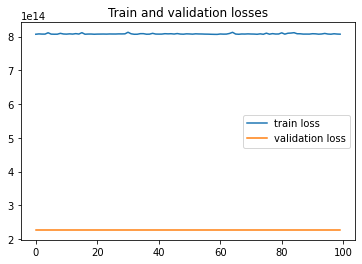

In [29]:
plt.title('Train and validation losses')
plt.plot(range(len(train_loss)), train_loss, label='train loss')
plt.plot(range(len(val_loss)), val_loss, label='validation loss')
plt.legend()
plt.show()

In [30]:
torch.save(model.state_dict(), r'C:\Users\João Ferreira\Desktop\FEUP\2022_2023\1S - 02 - MECD10 - Tópicos Avançados de Aprendizagem Computacional\Projeto_TAAC\Development\model_GOOGL_2012_2022.pt')

In [31]:
test_loss = evaluate(model, val_loader, device=DEVICE)
print(f'Test loss = {test_loss:.3f}')

loss = 137225027190784.000: 100%|██████████| 7/7 [00:00<00:00, 80.89it/s]

Test loss = 227006255389549.719


In [32]:
def predict(model, data_loader, **kwargs):
    num_steps = kwargs.get('num_steps', 24)
    device = kwargs.get('device', torch.device('cpu'))
    
    model.eval()
    preds = []
    pbar = tqdm(enumerate(data_loader), total=len(data_loader))
    for i, batch in pbar:
        ## YOUR CODE HERE ##
        batch['inputs'] = batch['inputs'].to(device)
        with torch.no_grad():
            preds_i = model(batch['inputs'], num_steps).cpu()
        preds.extend([pred for pred in preds_i])
        ## *** ##
    return preds

In [33]:
test_preds = predict(model, test_loader, num_steps=TARGET_WIDTH, device=DEVICE)

100%|██████████| 4/4 [00:00<00:00, 166.54it/s]


54


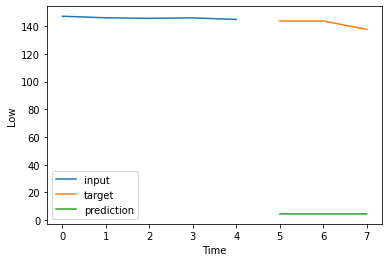

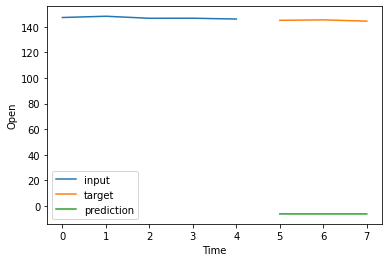

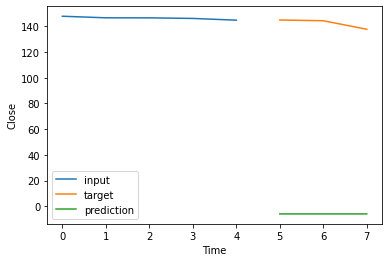

In [34]:
idx = random.randint(0, len(test_data))
print(len(test_data))
inputs = test_data[idx]['inputs'].numpy()
targets = test_data[idx]['targets'].numpy()
preds = test_preds[idx].numpy()

for i in [1, 2, 3]:
    plt.plot(range(INPUT_WIDTH), inputs[:,i], label='input')
    plt.plot(range(INPUT_WIDTH, INPUT_WIDTH + TARGET_WIDTH), targets[:,i], label='target')
    plt.plot(range(INPUT_WIDTH, INPUT_WIDTH + TARGET_WIDTH), preds[:,i], label='prediction')
    plt.ylabel(test_df.columns[i])
    plt.xlabel('Time')
    plt.legend()
    plt.show()

# RNN